# Chapter 5. Statistics

> ## <font color='red'>Describing a Single Set of Data</font> 
> - How many friends your members have?

In [1]:
from collections import Counter
import matplotlib.pyplot as plt

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

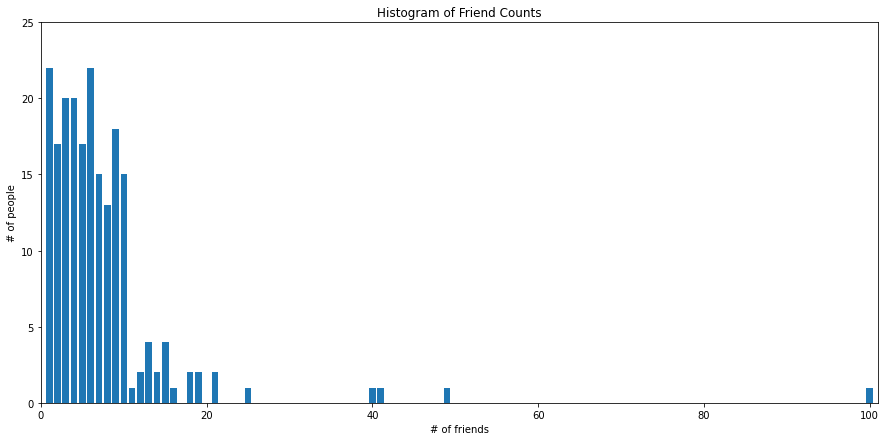

In [3]:
friend_counts = Counter(num_friends)

plt.figure(figsize=(15, 7))
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people");

> - Simplest Statistic:
    >> - Number of data points
    >> - Largest and smallest values

In [4]:
num_points = len(num_friends)
num_points

204

In [5]:
largest_value = max(num_friends)
smallest_value = min(num_friends)
smallest_value, largest_value

(1, 100.0)

> ## <font color='red'> Central Tendencies</font>

> <b>1. <font color='green'>Mean (or average):</b></font> which is just the sum of the data divided by its count

In [6]:
def mean(xs):
    return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

> If you have two data points, the mean is simply the point halfway between them. As you add more points, the mean shifts around, but it always depends on the value of every point. <br/>
> For example, if you have 10 data points, and you increase the value of any of them by 1, you increase the mean by 0.1.

> <b>2. <font color='green'>Median:</b></font> which is the middle-most value (if the number of data points is odd) or the average of the two middle- most values (if the number of data points is even)

> Notice that—unlike the mean—the <b>median doesn’t fully depend on every value in your data</b>. <br/>
> For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged, which means so does the median.

In [14]:
def _median_odd(xs):
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs):
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v):
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [15]:
print(median(num_friends))

6.0


- The mean is simpler to compute, and it varies smoothly as our data changes. 
- If we have n data points and one of them increases by some small amount e, then necessarily the mean will increase by <b>e / n</b>. 
 - In order to find the median, however, <b>we have to sort our data</b>. And changing one of our data points by a small amount e might increase the median by e, by some number less than e, or not at all (depending on the rest of the data).
- The <b>mean is very sensitive to outliers</b> in our data, then the mean can sometimes give us a misleading picture
- A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies <b>(the median represents the value under which 50% of the data lies)</b>

In [16]:
def quantile(xs, p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

> <b>3. <font color='green'>Mode, or Most Common</font> value(s)</b>

In [17]:
def mode(x):
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

> ## <font color='red'>Dispersion</font>

> - Dispersion refers to <b>measures of how spread out our data is.</b> 
> - Typically they’re statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out. 

> <b>1. <font color='green'>Range </b></font>, which is very simple measure, just the difference between the largest and smallest elements

In [18]:
def data_range(xs):
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

- The range is <b>zero</b> precisely when the max and min are equal, which can only happen if the elements of x are all the same, which means the data is as undispersed as possible. 
- Conversely, if the range is <b>large</b>, then the max is much larger than the min and the data is more spread out.
- <b> Like the median, the range doesn’t really depend on the whole dataset.

> <b>2. <font color='green'>variance</font> </b> is more complex measure of dispersion

In [20]:
from scratch.linear_algebra import sum_of_squares

def de_mean(xs):
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs):
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

> - The variance, on the other hand, has units that are the <b>square of the original units</b> (e.g., “friends squared”). As it can be hard to make sense of these we often look instead at the standard deviation <br/>
><b>3. <font color="green">standard deviation</font></b>

In [21]:
import math

def standard_deviation(xs):
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

> - Both the <b>range and the standard deviation have the same outlier problem that we saw earlier for the mean</b>
> - A more robust alternative computes the <b>difference between the 75th percentile value and the 25th percentile value

> <b> 4. <font color="green">Interquartile Range</font></b>

In [22]:
def interquartile_range(xs):
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

> ## <font color='red'>Covariance / Correlation</font>

> - The amount of time people spend on the site "daily_minutes" is related to the number of friends "num_friends" they have on the site

In [23]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

> <b>1. <font color="green">covariance</font></b>, the paired analogue of variance. 
> - Variance measures how a single variable deviates from its mean<br/>
Covariance measures how two variables vary in tandem from their means
> - var(x) == cov(x,x)

In [25]:
from scratch.linear_algebra import dot

def covariance(xs, ys) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

> - When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum. 
> - When one is above its mean and the other below, a negative number enters the sum.
> - A “large” positive covariance means that x tends to be large when y is large and small when y is small. 
> - A “large” negative covariance means the opposite—that x tends to be small when y is large and vice versa.
> - A covariance close to zero means that no such relationship exists.

> - Covariance number can be hard to interpret:
>> - If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense, the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

> <b><font color="green">Correlation</font></b>
> - Which divides out the standard deviations of both variables
> - Correlation is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation). A number like 0.25 represents a relatively weak positive correlation.

In [26]:
def correlation(xs, ys):
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

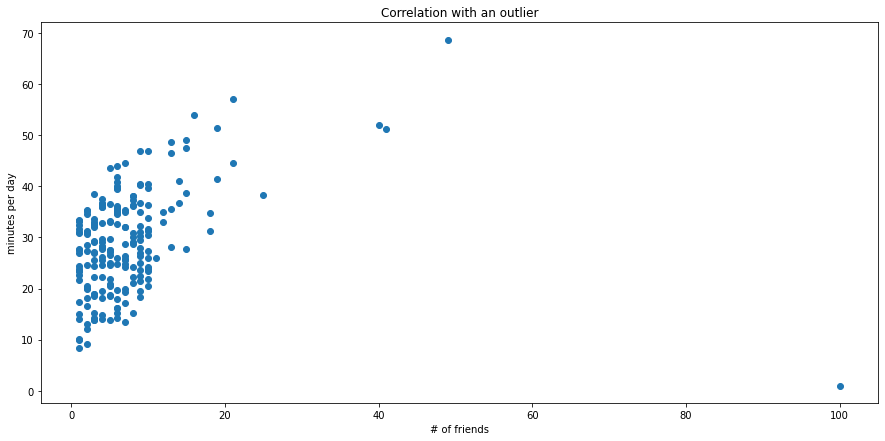

In [27]:
plt.figure(figsize=(15, 7))
plt.scatter(num_friends, daily_minutes)
plt.title("Correlation with an outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day");

> - The person with 100 friends (who spends only 1 minute per day on the site) is a huge outlier, and correlation can be very sensitive to outliers. What happens if we ignore him?

In [28]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [29]:
assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

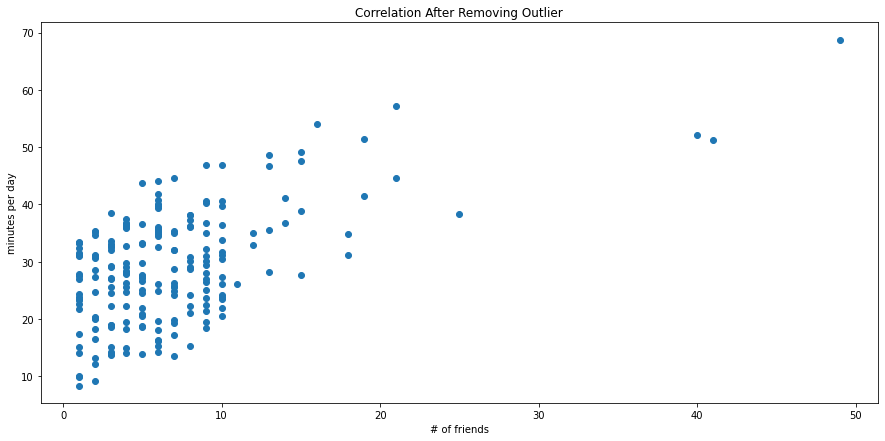

In [30]:
plt.figure(figsize=(15, 7))
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Correlation After Removing Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day");

> - Without the outlier, there is a much stronger correlation
> - You investigate further and discover that the outlier was actually an internal test account that no one ever bothered to remove. So you feel justified in excluding it

> ## <font color='red'>Simpson’s Paradox</font>

> <b>Simpson's Paradox</b>
> is a statistical phenomenon where an association between two variables in a population emerges, disappears or reverses when the population is divided into subpopulations.
> - correlations can be misleading when confounding variables are ignored

<table>
<thead>
<tr>
    <th>Coast</th>
    <th># of members</th>
    <th>Avg. # of friends</th>
</tr>
</thead>
<tbody>
<tr>
    <td>West Coast</td>
    <td>101</td>
    <td>8.2</td>
</tr>
 <tr>
    <td>East Coast</td>
    <td>103</td>
    <td>6.5</td>
</tr>
</tbody>
</table>

> It certainly looks like the West Coast data scientists are friendlier than the East Coast data scientists

<table>
<thead>
<tr>
    <th>Coast</th>
    <th>Degree</th>
    <th># of members</th>
    <th>Avg. # of friends</th>
</tr>
</thead>
<tbody>
<tr>
    <td>West Coast</td>
    <td>PhD</td>
    <td>35</td>
    <td>3.1</td>
</tr>
<tr>
    <td>East Coast</td>
    <td>PhD</td>
    <td>70</td>
    <td>3.2</td>
</tr>
<tr>
    <td>West Coast</td>
    <td>No PhD</td>
    <td>66</td>
    <td>10.9</td>
</tr>
<tr>
    <td>East Coast</td>
    <td>No PhD</td>
    <td>33</td>
    <td>13.4</td>
</tr>
</tbody>
</table>

> But when playing with the data, you discover something very strange. If you look only at people with PhDs, the East Coast data scientists have more friends on average. And if you look only at people without PhDs, the East Coast data scientists also have more friends on average!

> Once you account for the users’ degrees, the correlation goes in the opposite direction!

> <b>** The key issue is that correlation is measuring the relationship between your two variables all else being equal

> ## <font color='red'>Some Other Correlational Caveats</font>

> - <b>1. <font color="green">A correlation of zero</font></b> indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships

In [31]:
x = [-2, -1, 0, 1, 2]
y = [ 2, 1, 0, 1, 2]

- Then x and y have zero correlation. But they certainly have a relationship— each element of y equals the absolute value of the corresponding element of
x. What they don’t have is a relationship in which knowing how x_i compares to mean(x) gives us information about how y_i compares to mean(y) . That is the sort of relationship that correlation looks for.

> - <b>2.</b> In addition, correlation tells you nothing about <b><font color="green">how large the relationship</font></b> is

In [32]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

> are perfectly correlated, but (depending on what you’re measuring) it’s quite possible that this relationship isn’t all that interesting.

> ## <font color='red'>Correlation and Causation</font>
> “correlation is not causation,”

> If x and y are strongly correlated, that might mean that x causes y , that y causes x , that each causes the other, that some third factor causes both, or nothing at all.

> One way to feel more confident about causality is by conducting randomized trials. If you can randomly split your users into two groups with similar demographics and give one of the groups a slightly different experience, then you can often feel pretty good that the different experiences are causing the different outcomes.

> You could randomly choose a subset of your users and show them content from only a fraction of their friends. If
this subset subsequently spent less time on the site, this would give you some confidence that having more friends _causes more time to be spent on the site

> Searching Points:
> - Intention
> - IID(Indentically Independent): no correlation with any variable 